In [1]:
#!pip install netcdf4
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

,Unnamed: 0,YYYMMDD,hh:mm,Decimal Degrees,Decimal Degrees.1,deg C,uS/cm,NTU,ug/L,ug/L.1,mg/L,cm,m/s,m
0,Ath Abv Cec,20100621,12:51,58.44226,-111.37828,20.46,252.5,72.7,14.84,321.34,102.1429,25.0,1.03,3.1
1,Ath Abv Cec,20100621,13:19,58.44348,-111.38070,20.49,252.2,72.8,15.80,320.33,115.7143,25.0,0.95,2.8
2,Ath Abv FC,20100621,14:12,58.45258,-111.08581,20.51,252.5,74.2,15.32,319.07,92.5000,35.0,0.78,4.4
3,Ath Abv FC,20100621,14:21,58.45248,-111.08511,20.50,250.3,63.5,14.63,334.91,90.0000,33.5,0.77,4.7
4,Ath Abv FC,20100621,14:29,58.45261,-111.08594,20.51,250.8,65.2,14.17,333.51,72.8571,31.5,0.80,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,QF TM,20100706,11:18,58.73651,-111.41180,17.44,363.5,130.3,9.56,218.64,-9999.0000,15.0,0.74,6.2
173,QF Middle,20100706,11:37,58.78519,-111.45411,18.44,371.1,172.8,10.61,198.39,122.5000,12.0,0.80,4.4
174,QF BM,20100706,12:00,58.83385,-111.56914,18.56,347.0,134.3,11.12,212.80,154.2857,15.0,0.83,4.7
175,QF at Peace,20100706,12:16,58.88858,-111.60782,18.42,347.8,140.6,12.68,206.29,166.0714,17.0,0.77,2.6


(177,)
(177,)
(177,)
[array([[14.84, 15.8 , 15.32, ..., 11.12, 12.68,  4.39],
       [14.84, 15.8 , 15.32, ..., 11.12, 12.68,  4.39],
       [14.84, 15.8 , 15.32, ..., 11.12, 12.68,  4.39],
       ...,
       [14.84, 15.8 , 15.32, ..., 11.12, 12.68,  4.39],
       [14.84, 15.8 , 15.32, ..., 11.12, 12.68,  4.39],
       [14.84, 15.8 , 15.32, ..., 11.12, 12.68,  4.39]]), array([[14.84, 14.84, 14.84, ..., 14.84, 14.84, 14.84],
       [15.8 , 15.8 , 15.8 , ..., 15.8 , 15.8 , 15.8 ],
       [15.32, 15.32, 15.32, ..., 15.32, 15.32, 15.32],
       ...,
       [11.12, 11.12, 11.12, ..., 11.12, 11.12, 11.12],
       [12.68, 12.68, 12.68, ..., 12.68, 12.68, 12.68],
       [ 4.39,  4.39,  4.39, ...,  4.39,  4.39,  4.39]])]


/tmp/ipykernel_782/202987110.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, chlorophyll_2[0])


Text(0.5, 1.0, 'Chlorophyll Concentration with Depth at Peace-Athabasca Delta, Canada')

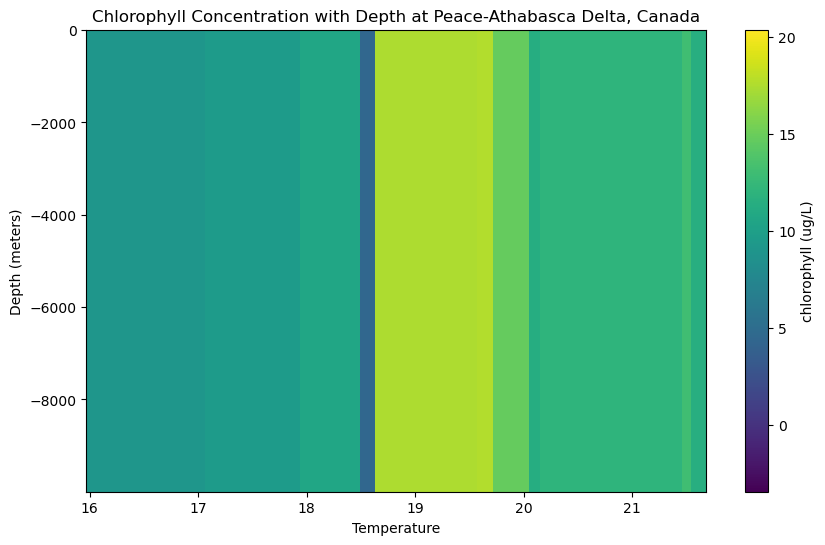

In [3]:
#import dataset
pad_2010 = pd.read_csv('pad_water_quality_2010.csv', delimiter = ',', header = 9)
display(pad_2010)

data = pad_2010.squeeze()

#index values
long = pad_2010['Decimal Degrees.1'].to_numpy()
depth = pad_2010['m'].to_numpy()
chlorophyll = pad_2010['ug/L'].to_numpy()
temp = pad_2010['deg C'].to_numpy()

#find the shape of the arrays
print(long.shape)
print(depth.shape)
print(chlorophyll.shape)

#plot the figure
fig, ax = plt.subplots(figsize=(10, 6))

#long, depth = np.meshgrid(np.arange(ncols), np.arange(nrows))
X,Y = np.meshgrid(temp, depth)
chlorophyll_2 = np.meshgrid(chlorophyll,chlorophyll)
print(chlorophyll_2)

#plt.pcolormesh(x = long, y = depth, c = chlorophyll, cmap='plasma')
plt.pcolormesh(X, Y, chlorophyll_2[0])
c = plt.colorbar() 
c.set_label('chlorophyll (ug/L)')
ax.set_ylabel('Depth (meters)')
ax.set_xlabel('Temperature')
ax.set_title('Chlorophyll Concentration with Depth at Peace-Athabasca Delta, Canada')

In [ ]:
#transpose data
chlorophyll_flipT = np.transpose(np.flip(chlorophyll))
# store shape of flipped and transposed chlrophyll, then print
chlorophyll_flipT_shape = chlorophyll_flipT.shape
print(chlorophyll_flipT_shape)